In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


LOAD DATASETS

In [2]:
X, y = datasets.load_iris(return_X_y=True)


TRAIN TEST SPLIT

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TRAIN SVM MODEL

In [4]:
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

PREDICTION AND METRICS

In [5]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



CONFUSION MATRIX VISUALIZATION

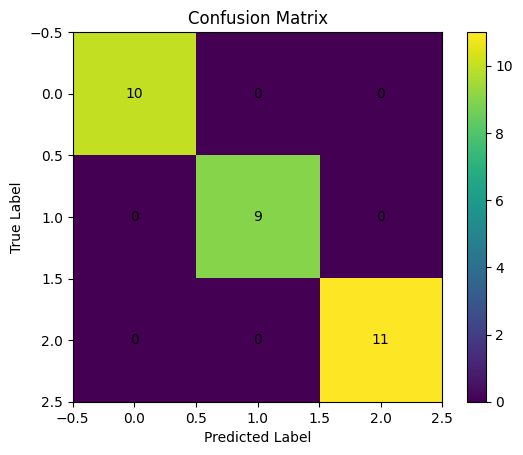

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


PCA FOR 2D VISUALIZATION

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)


TRAIN SVM ON PCA DATA

In [8]:
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_train_pca, y_train_pca)


SVC(kernel='linear')

DECISION BOUNDARY PLOT

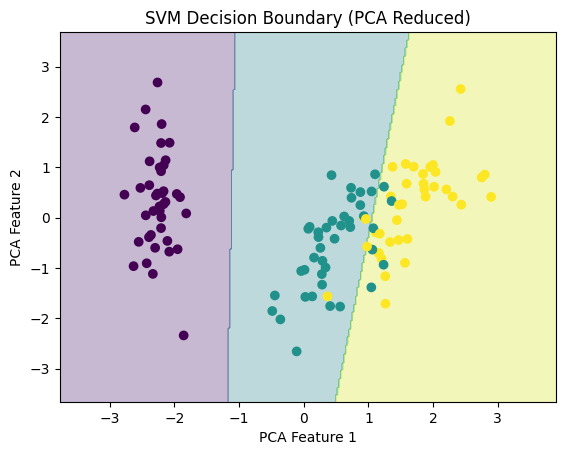

In [9]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.title("SVM Decision Boundary (PCA Reduced)")
    plt.show()

plot_decision_boundary(svm_2d, X_train_pca, y_train_pca)
